In [213]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, stats


import warnings
warnings.filterwarnings("ignore")


# Background

AWS (Amazon Web Services) is a leading cloud platform that supports Software-as-a-Service (SaaS) companies by providing a comprehensive suite of cloud services. Since its inception in 2006, AWS has enabled organizations to deliver applications over the internet, allowing for scalable, efficient, and cost-effective business models. It has several digital license products and consumers in diverse sectors. This company has had sales activity for several years. We analyse those data transaction to increase Saas Company sales and revenue.


# Problem Statement

AWS (Amazon Web Service) company have SaaS product is company that sells software by licencing esepcially for B2B (Business to Business) segment. AWS has customers spread throughout the world. They have record and collected their sales transaction from their cudtomers. Based on the data that tey had, AWS want to anlalyze:

* AWS SaaS sales performance. Identify how their product performance in sales, quantity, and profit compared each others. How is the sales and profit trend time by time.
* AWS SaaS target market. Identify where is most potential and promising region, country, in order to increasing profit and sales.
* AWS customers segment. Identify customers behavior in each segment and industry, anlyze is there any correlation for each segment into AWS profit.  



# Objective

- Find the most performed product.
- Find trends that occur in several years.
- Find the most potential market based on several categories and loyal customers.
- Find most perform segment and industry.

# Method and tools

- Inferential statistics
- Association
- Python


# Data

This dataset contains transaction data from a fictitious AWS SaaS company selling and marketing software to other companies (B2B). In the dataset, each row represents a product in a transaction, and the columns include:


1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.


### Assesing Data

In [214]:

df=pd.read_csv('SaaS-Sales.csv', sep=',').set_index('Row ID')
df.head(5)

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### Data Preprocessing

In [215]:
print(f'This dataframe have {df.shape[0]} rows and {df.shape[1]} columns')
df.info(verbose=True)

This dataframe have 9994 rows and 18 columns
<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Date Key      9994 non-null   int64  
 3   Contact Name  9994 non-null   object 
 4   Country       9994 non-null   object 
 5   City          9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Subregion     9994 non-null   object 
 8   Customer      9994 non-null   object 
 9   Customer ID   9994 non-null   int64  
 10  Industry      9994 non-null   object 
 11  Segment       9994 non-null   object 
 12  Product       9994 non-null   object 
 13  License       9994 non-null   object 
 14  Sales         9994 non-null   float64
 15  Quantity      9994 non-null   int64  
 16  Discount      9994 non-null   float64
 17  Profit        9994 non-null   f

In [216]:
# check stastistic descriptive each columns

display(df.describe(), df.describe(include='object'))

,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [217]:
# check if there any null columns
df.isnull().sum()

Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [218]:
# check if there any duplicated columns
df.duplicated().sum()

np.int64(0)

After data access and data processing, we can summarize this:
1. Dataset Saas-Sales has 9994 rows and 18 columns.
2. After we check for duplicates and missing values in the data, we can assume that the dataset is clean enough.
3. Columns `Order Date` and `Date Key` has a data type object. From the description, those columns should be in datetime format.
4. Columns `Date Key` and `Customer ID` represent the same value as the previous column. It can be inferred that these columns aren't relevant to use and should be deleted.
5. The column `Order ID` seems to have several values, so it can be analyzed deeper to find the pattern.


##### Data Formatting

In [220]:
listItem = []

for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
1,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
2,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
3,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
4,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
5,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
6,Region,3,"[EMEA, AMER, APJ]"
7,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
8,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."
9,Customer ID,99,"[1017, 1056, 1031, 1065, 1062, 1066, 1074, 108..."


In [221]:
# Change column 'Order Date','Date Key', 'Ord_year' into datetime format

datetime_col = ['Order Date','Date Key']

for column in datetime_col:
  df[column] = pd.to_datetime(df[column])

In [222]:
# create dataframe copy
df2 = df.copy()
df2.head()

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,
1,EMEA-2022-152156,2022-11-09,1970-01-01 00:00:00.020221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
2,EMEA-2022-152156,2022-11-09,1970-01-01 00:00:00.020221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
3,AMER-2022-138688,2022-06-13,1970-01-01 00:00:00.020220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
4,EMEA-2021-108966,2021-10-11,1970-01-01 00:00:00.020211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
5,EMEA-2021-108966,2021-10-11,1970-01-01 00:00:00.020211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [223]:
# separate column Order ID into several columns
df2[['Ord_reg','Ord_year','Order Id']] = df['Order ID'].str.split('-', expand=True)
df2 = df2.drop(['Order ID'], axis=1)
df2.head()

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Ord_reg,Ord_year,Order Id
Row ID,,,,,,,,,,,,,,,,,,,,
1,2022-11-09,1970-01-01 00:00:00.020221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,EMEA,2022,152156
2,2022-11-09,1970-01-01 00:00:00.020221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,EMEA,2022,152156
3,2022-06-13,1970-01-01 00:00:00.020220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,AMER,2022,138688
4,2021-10-11,1970-01-01 00:00:00.020211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,EMEA,2021,108966
5,2021-10-11,1970-01-01 00:00:00.020211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,EMEA,2021,108966


In [224]:
df2['Order Year'] = df2['Order Date'].dt.year
df2['Order Month'] = df2['Order Date'].dt.month
df2['Order Day'] = df2['Order Date'].dt.day


# change value column 'Month' with month name
month_name = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df2['Order Month'] = df2['Order Month'].map(month_name)


In [225]:
df2.head()

,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,...,Sales,Quantity,Discount,Profit,Ord_reg,Ord_year,Order Id,Order Year,Order Month,Order Day
Row ID,,,,,,,,,,,,,,,,,,,,,
1,2022-11-09,1970-01-01 00:00:00.020221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,...,261.9600,2,0.00,41.9136,EMEA,2022,152156,2022,November,9
2,2022-11-09,1970-01-01 00:00:00.020221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,...,731.9400,3,0.00,219.5820,EMEA,2022,152156,2022,November,9
3,2022-06-13,1970-01-01 00:00:00.020220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,...,14.6200,2,0.00,6.8714,AMER,2022,138688,2022,June,13
4,2021-10-11,1970-01-01 00:00:00.020211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,...,957.5775,5,0.45,-383.0310,EMEA,2021,108966,2021,October,11
5,2021-10-11,1970-01-01 00:00:00.020211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,...,22.3680,2,0.20,2.5164,EMEA,2021,108966,2021,October,11


In [226]:
# We assumed that columns Date Key and Customer ID have similarity with previous columns, so we decided to delete them.

df2 = df2.drop(columns=['Date Key','Customer ID','Ord_year','Ord_reg'])

In [227]:
# Find total amount of discount 
df2['Discount Amount'] = df2['Discount']*df2['Sales']

In [ ]:
# Categoryze each transaction apply discount or not
df2['Discount Category'] = df2['Discount'].\
  apply(lambda x: 'Yes' if x>0 else 'No')

In [229]:
# Group each trasaction into 'Profit','Loss','BEP' based on profit amount

def trans_category(x):
  if x < 0:
    return 'Loss'
  elif x > 0:
    return 'Profit'
  else:
    return 'bep'
    
df2['Transaction Category'] = df2['Profit'].apply(trans_category)

In [230]:
df2.head(5)

,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,...,Quantity,Discount,Profit,Order Id,Order Year,Order Month,Order Day,Discount Amount,Discount Category,Transaction Category
Row ID,,,,,,,,,,,,,,,,,,,,,
1,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,...,2,0.00,41.9136,152156,2022,November,9,0.000000,No,Profit
2,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,...,3,0.00,219.5820,152156,2022,November,9,0.000000,No,Profit
3,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,...,2,0.00,6.8714,138688,2022,June,13,0.000000,No,Profit
4,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,...,5,0.45,-383.0310,108966,2021,October,11,430.909875,Yes,Loss
5,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,...,2,0.20,2.5164,108966,2021,October,11,4.473600,Yes,Profit


In [231]:
# Final dataframe format
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Date            9994 non-null   datetime64[ns]
 1   Contact Name          9994 non-null   object        
 2   Country               9994 non-null   object        
 3   City                  9994 non-null   object        
 4   Region                9994 non-null   object        
 5   Subregion             9994 non-null   object        
 6   Customer              9994 non-null   object        
 7   Industry              9994 non-null   object        
 8   Segment               9994 non-null   object        
 9   Product               9994 non-null   object        
 10  License               9994 non-null   object        
 11  Sales                 9994 non-null   float64       
 12  Quantity              9994 non-null   int64         
 13  Discount              9

# EDA

##### Product performance

This section, we want to know information about each product in order to analyze most perform product with comparing into several variabel like `Profit`, `Sales`, `Quantity`, and `Discount Amount`. We want to answer several question:

* What product with largest sales, profit, and sales by quantity?
* Is there any patern with most profitable prordut? 

In [232]:
from plotly.subplots import make_subplots

# Top 5 product sales
Product_sales = df2.groupby(by='Product', as_index=False)[['Sales','Profit']].\
  sum().sort_values(by='Sales', ascending=False).reset_index(drop=True).head(5)

# Top 5 product profit
Product_profit = df2.groupby(by='Product', as_index=False)[['Sales','Profit']].\
  sum().sort_values(by='Profit', ascending=False).reset_index(drop=True).head(5)

# Top 5 product order quantity
Product_qty = df2.groupby(by='Product', as_index=False)['Quantity'].\
  sum().sort_values(by='Quantity', ascending=False).reset_index(drop=True).head(5)

# Top 5 product discount amount
Product_discount = df2.groupby(by='Product', as_index=False)['Discount Amount'].\
  sum().sort_values(by='Discount Amount', ascending=False).reset_index(drop=True).head(5)

Prod_performance = make_subplots(rows=2, cols=2,
                                 subplot_titles=( "Top 5 Products by Sales",
                                                  "Top 5 Products by Profit",
                                                  "Top 5 Products by Order Quantity",
                                                  "Top 5 Product by Discount Amount")
                                 )

Prod_performance.add_trace(
  go.Bar(x=Product_sales['Product'], y=Product_sales['Sales']),\
  row=1, col= 1
)

Prod_performance.add_trace(
  go.Bar(x=Product_profit['Product'], y=Product_profit['Profit']),\
  row=1, col= 2
)

Prod_performance.add_trace(
  go.Bar(x=Product_qty['Product'], y=Product_qty['Quantity']),\
  row=2, col= 1
)

Prod_performance.add_trace(
  go.Bar(x=Product_discount['Product'], y=Product_discount['Discount Amount']),\
  row=2, col= 2
)

Prod_performance.update_layout(
  title_text="Product Performance",
  title_x=0.5,  # Center the title
  title_font=dict(size=24), 
  showlegend=False,
  height=800, 
  width=1300  
)
Prod_performance.show()

From that table, we can infer the top 5 perform products in the last 3 years by each parameter:

* ContactMatcher has the first position in several measurements: sales, quantity, and discount amount. We can analyze more deeply to examine whether there is any reason behind this product's performance.
* Alchemy has been the most profitable product in the last 3 years.

In [263]:
# See product with high sales and low profit

profit_sales_compared= df2.groupby(by='Product').agg({
  'Sales' : 'sum',
  'Profit' : 'sum',
  'Discount Amount' : 'sum'
}).sort_values('Sales', ascending=False)

profit_sales_compared = profit_sales_compared.round(0)

profit_sales_compared.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '12px'})

,Sales,Profit,Discount Amount
Product,,,
ContactMatcher,410378.000000,12496.000000,87937.000000
FinanceHub,340935.000000,32136.000000,50464.000000
Site Analytics,330007.000000,44516.000000,48093.000000
Marketing Suite - Gold,223844.000000,21279.000000,13198.000000
Big Ol Database,189239.000000,3385.000000,46766.000000
Data Smasher,167380.000000,41937.000000,9802.000000
Alchemy,149528.000000,55618.000000,18000.000000
Support,125153.000000,32864.000000,8087.000000
Marketing Suite,114880.000000,-3473.000000,20801.000000


This measurement is to analyze what reason affected product sales; we can infer that:
* ContactMatcher has become the most considerable amount in sales and several measurements because it has applied a large amount of discount, too. But it has a lower profit than expected.
* FinanceHub and Site Matcher are the second and third-place products by sales, with relatively equal measurements by sales, profit, and discount applied.
* Alchemy became the most profitable product with low discounts and sales amounts. It can be inferred that Alchemy became the most effective product compared to others.

##### Trend Analysis
This section is to analyze trend by `Profit` and `Sales` compared year by year (YoY).

* How sales and profit growth performance? are they positive or negative?
* What the best time that we can analyze to increase sales and profitability?


In [234]:
# Sales and Profit analysis 

sales_profit_df = df2.groupby(by='Order Date', as_index=False).agg({
  'Sales' : 'sum',
  'Profit' : 'sum'
})

# separate column 'Order Date' 
sales_profit_df['Year'] = sales_profit_df['Order Date'].dt.year
sales_profit_df['Month'] = sales_profit_df['Order Date'].dt.month
sales_profit_df['Day'] = sales_profit_df['Order Date'].dt.day

# drop column order date
sales_profit_df.drop(columns='Order Date', axis=1, inplace=True)

sales_profit_df = sales_profit_df.groupby(by=['Year','Month'], as_index=False).agg({
  'Sales' : 'sum',
  'Profit' : 'sum'
}).sort_values(by=['Year'], ascending=True)

sales_profit_df = sales_profit_df.round(2)

# change value column 'Month' with month name
month_name = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
             7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

sales_profit_df['Month'] = sales_profit_df['Month'].map(month_name)


In [235]:
YoY_analysis = sales_profit_df.groupby(by=['Year'], as_index=False).agg({
  'Sales' : 'sum',
  'Profit' : 'sum'
}).sort_values(by=['Year'], ascending=True)


YoY_analysis['YoY Sales'] = (YoY_analysis['Sales'].pct_change() * 100).round(2)
YoY_analysis['YoY Profit'] = (YoY_analysis['Profit'].pct_change() * 100).round(2)

YoY_analysis.fillna(value=0,inplace=True)

YoY_analysis

,Year,Sales,Profit,YoY Sales,YoY Profit
0,2020,484247.50,49543.98,0.00,0.00
1,2021,470532.50,61618.62,-2.83,24.37
2,2022,608473.82,81726.92,29.32,32.63
3,2023,733947.02,93507.52,20.62,14.41


In [236]:
# profit trend analysis

fig = px.line(sales_profit_df, x='Month', y='Profit', color='Year', title='Profit Compared Each Year')
fig.show()

In [237]:
# sales trend analysis

fig = px.line(sales_profit_df, x='Month', y='Sales', color='Year', title='Sales Compared Each Year')
fig.show()

From the result analysis of `Sales` and `Profit` growth, we can infer:

* The highest sales and profit compared to each year (YoY) is in 2022. There was a 29.32% sales increase from the previous year and a 32.63% profit increase from the prior year.
* The graphical chart shows a positive monthly trend for each year. We can see that sales increased significantly from August until December.
* The highest profit was reached in October 2022 at 1567.38 , and the lowest was in July 2020 at -841.48.
* Based on the graphical chart, profit tends to decline in the middle of the year starting in April, while it tends to increase at the beginning and end of the year.


##### Customer performance analysis

`Customer` analysis involves analyzing each customer based on their transaction. Sales, Profit, Quantity, and Discount amount become parameters to judge whether customers have significant revenue for Saas Company. We want to analyze:
* Who are customers contribute significantly into sales and profit Saas Company?
* What are factors that affect customers transaction?


In [238]:
# Top 5 customer by order frequency 

order_customers = (
    df2.groupby(by=['Order Year', 'Customer'], as_index=False)['Order Id']
    .nunique()
    .sort_values(by=['Order Year', 'Order Id'], ascending=[True, False])
    .groupby('Order Year')
    .head(5)
    .reset_index(drop=True)
)
order_customers

,Order Year,Customer,Order Id
0,2020,Ford Motor,22
1,2020,ConocoPhillips,18
2,2020,Intel,18
3,2020,Tyson Foods,18
4,2020,Aetna,17
5,2021,Siemens,23
6,2021,Allianz,21
7,2021,Ford Motor,19
8,2021,Sony,19
9,2021,ConocoPhillips,18


In [239]:
# Top 5 customer by profit 

profit_customers = (
  df2.groupby(by=['Order Year', 'Customer'], as_index=False)['Profit']
  .sum()
  .sort_values(by=['Order Year', 'Profit'], ascending=[True, False])
  .groupby('Order Year')
  .head(5)
  .reset_index(drop=True)
)

profit_customers

,Order Year,Customer,Profit
0,2020,Anthem,3512.3590
1,2020,Johnson & Johnson,2841.8385
2,2020,Itochu,2719.0437
3,2020,Walt Disney,2488.0689
4,2020,Ford Motor,2097.2019
5,2021,Lukoil,5508.8313
6,2021,BNP Paribas,3919.4427
7,2021,Siemens,3187.2847
8,2021,AT&T,2654.5877
9,2021,BMW,2611.1584


In [240]:
customers = df2.groupby('Customer', as_index=False).agg({
  'Sales' : 'sum',
  'Profit' : 'sum',
  'Quantity' : 'sum',
  'Discount Amount' : 'sum',
  'Order Id' : 'nunique'
})


customers[['Discount Amount','Sales','Profit']] = customers[['Discount Amount','Sales','Profit']].round(2)

customers_fig = go.Figure(data=[go.Table(
  header=dict(values=list(customers.columns),
              align='center'),
  cells=dict(values= [customers['Customer'],customers['Sales'], customers['Profit'],\
                      customers['Quantity'], customers['Discount Amount'], customers['Order Id']],
             align='left'))
])

customers_fig.show()

In [278]:
customersprof = customers.sort_values(by='Profit', ascending=False).head(10)
customersprof.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '12px'})

,Customer,Sales,Profit,Quantity,Discount Amount,Order Id
92,Valero Energy,41220.420000,10308.630000,418,2953.270000,58
28,Coca-Cola,28643.800000,9449.020000,305,1620.510000,38
88,Trafigura Group,33447.130000,8867.830000,359,3393.810000,52
62,Mondelez International,32993.050000,8577.650000,519,2900.980000,61
55,Lowes,40360.160000,7937.490000,439,4018.200000,58
56,Lukoil,35199.180000,7117.090000,431,4688.430000,53
80,Siemens,36008.370000,6519.510000,639,3796.220000,86
16,Bank of America Corp.,41255.950000,6449.860000,530,4830.630000,65
54,Kroger,29783.460000,6256.100000,534,2678.940000,76
10,Anthem,55719.210000,5953.200000,523,13952.870000,58


In [ ]:
unprofitable_customers = customers[customers['Profit']<0].sort_values(by='Profit')
unprofitable_customers.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '12px'})

,Customer,Sales,Profit,Quantity,Discount Amount,Order Id
5,Allstate,39941.640000,-2796.290000,411,8453.740000,61
19,Bosch,25445.000000,-1823.780000,474,5628.940000,60
66,Nissan Motor,22650.820000,-1585.190000,277,5498.590000,40
31,Costco Wholesale,21796.700000,-1354.850000,236,5742.110000,37
95,Walgreens,14420.620000,-740.670000,241,2731.250000,33
82,Sprint Nextel,18852.080000,-462.660000,370,3571.660000,51
63,Morgan Stanley,28631.450000,-361.810000,484,5937.930000,60
46,HonHai Precision Industry,18457.420000,-136.700000,407,4381.190000,40
44,HSBC Holdings,22703.840000,-104.400000,340,4787.070000,41
39,Gazprom,5402.900000,-13.970000,193,1073.270000,23


Based on the analysis result, we can infer:
* Top 3 profitable customers in entire years are Valero Energy (10.308,63), Coca-Cola (9.449,02), and Mondelez International (8.577,65).
* Anthem has become the most significant sales amount transaction with 55719.21, but it has also been the largest discount receiver, with 13952.87. Discounts may be one of the factors that encourage customers to buy.
* Tyson Foods become the most significant quantity order company, 747, with 87 times transactions. It means 8-9 product average per transaction.

##### Industry & Segment Analysis
Saas Company is B2B company that have a lot of customers with different background. In order to increase sales and profit Saas Company want to analyze their customers `Industry` and `Segment`.
* Wich industry that have most potential customers?
* Wich most potential customers industry?

In [241]:
# industry 

df2.groupby('Industry').agg({
  'Sales' : 'sum',
  'Profit' : 'sum'
}).sort_values('Profit', ascending=False)

,Sales,Profit
Industry,,
Finance,474150.4844,50348.9696
Energy,304644.1409,45282.3137
Manufacturing,295192.3812,38413.1064
Consumer Products,224044.1422,37018.0077
Healthcare,273183.2882,31969.0932
Retail,223072.0720,30207.8208
Tech,263169.0277,24615.0436
Communications,120962.2365,13976.3410
Transportation,90191.3276,7402.6967


In [242]:
# segment

df2.groupby('Segment').agg({
  'Sales' : 'sum',
  'Profit' : 'sum'
}).sort_values('Profit', ascending=False).round(2)

,Sales,Profit
Segment,,
SMB,1161401.34,134119.21
Strategic,706146.37,91979.13
Enterprise,429653.15,60298.68


In [243]:

result = df2.groupby(by=['Segment','Industry']).agg({
  'Sales' : 'sum',
  'Profit' : 'sum'
})

result = result.sort_values(by=['Segment', 'Profit'], ascending=[True, False])
result


Sales      Profit
Segment    Industry                                  
Enterprise Finance             82457.5406  13290.0197
           Manufacturing       68074.3730  10007.3825
           Tech                47643.9178   8561.7474
           Retail              41968.6890   7318.9971
           Energy              49805.1515   6329.6102
           Misc                20372.7306   6076.5008
           Healthcare          57028.2980   3492.4449
           Consumer Products   15181.4770   2098.2969
           Transportation      26136.4770   2085.1833
           Communications      20984.4940   1038.4957
SMB        Energy             142548.2996  23971.6794
           Healthcare         160185.3262  21336.6021
           Retail             125925.0485  18576.1458
           Manufacturing      143552.5134  18367.4297
           Consumer Products  125927.3138  17682.4447
           Finance            241120.2914  16306.9959
           Tech               114981.7670   9656.2679
           Transportation      55581.8406   3868.0196
           Communications      45692.8375   3558.9593
           Misc                 5886.1070    794.6648
Strategic  Finance            150572.6524  20751.9540
           Consumer Products   82935.3514  17237.2661
           Energy             112290.6898  14981.0241
           Manufacturing       83565.4948  10038.2942
           Communications      54284.9050   9378.8860
           Healthcare          55969.6640   7140.0462
           Tech               100543.3429   6397.0283
           Retail              55178.3345   4312.6779
           Transportation       8473.0100   1449.4938
           Misc                 2332.9220    292.4634

Based on the analysis result, we can answer that:
* Most potential segment is SMB (Small Medium Business), Strategic, and Enterprise.
* Top 3 potential industry are finance, energy, manufacture. It can be proven by top industry in each segment is finance and energy.

##### Geographical Analysis
This analysis is to identification and map potential customers based on their location. It can help company to make sales and operational more effective and efficient to target potential customers. We want to analyze:
* Where location (Country/Region) with largest amount of sales and profit?
* Wich location have most potential customers?

In [244]:
# Display sum of quantity order based on regional annually

Ord_quantity = df2.groupby(by=['Order Year','Region'], as_index=False).agg({
  'Quantity' : 'sum',
  'Order Id' : 'nunique'
}).sort_values(by=['Order Year','Quantity'])

# change columns name
Ord_quantity.rename(columns={
  'Order Year' : 'Year',
},inplace=True)


Ord_quantity_graph = px.bar(Ord_quantity, x='Region', y='Quantity', color='Year',
             facet_col='Year', 
             title='Quantity order based on regional annually',
             color_continuous_scale='viridis'
             )
Ord_quantity_graph.show()

In [245]:

df2.groupby(by='Country').agg({
  'Sales' : 'sum',
}).sort_values(by="Sales", ascending=False).reset_index().head(10)


plt.figure(figsize=(10,10))
cloropleth = px.choropleth(
  data_frame= df2.groupby(by='Country').agg({
              'Sales' : 'sum',
              }).sort_values(by="Sales", ascending=False).reset_index().head(10),
  locations='Country',
  locationmode='country names',
  color='Sales',
  title='Heatmap of sales each country',
  color_continuous_scale='viridis',
)
cloropleth.update_layout(margin={"r":1,"t":0,"l":1,"b":0},
                         title = 'Top 10 Country')
cloropleth.show()


<Figure size 1000x1000 with 0 Axes>

In [280]:
grouped_country = df2.groupby('Region', as_index=False)['Country'].unique()
grouped_country



,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Ch..."
1,APJ,"[Japan, Australia, Philippines, India, Singapo..."
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, Fran..."


In [247]:
grouped_industry = df2.groupby(by=['Region','Segment']).agg({
  'Industry' : 'count',
  'Profit' : 'sum'
  })
grouped_industry = grouped_industry.round(2)
grouped_industry


Industry    Profit
Region Segment                       
AMER   Enterprise       654  23078.00
       SMB             1918  64474.88
       Strategic       1093  39874.11
APJ    Enterprise       385   4210.19
       SMB             1093  -5314.43
       Strategic        632  12618.23
EMEA   Enterprise       744  33010.49
       SMB             2180  74958.76
       Strategic       1295  39486.80

We can conclude, based on analysis, that:
* The most significant order by quantity based on region year by year is still AMEA, AMER, and APJ.
* Generally, AMEA is the most promising region because it has the largest SMB segment. As we have analyzed, SMB has become the most profitable segment.
* The USA has the top 10 sales by country, followed by the United Kingdom in second place and another country in the EMEA region.

# Statistical Test

In [248]:
# select columns with numerical value and identify their correlation
num_val = (df2.select_dtypes(exclude=['object','datetime64[ns]','int32']))
num_val = num_val.corr().round(2)

fig = px.imshow(num_val, text_auto=True, color_continuous_scale='viridis')
fig.show()

We can infer: 

1. Profit has a strong positive relationship with Profit Margin. This means that the higher the Profit obtained, the higher the percentage of Profit Margin received.

2. Sales has a weak positive relationship with Profit and Profit Margin. This implies that when Sales increase, the value and percentage of Profit and Profit Margin also increase.

3. Sales has a weak negative relationship with Discount. This suggests that when Sales decrease, it is caused by an increase in Discounts.

4. Discount has a strong negative relationship with Profit and Profit Margin. This indicates that when the value of Discount is high, Profit and Profit Margin experience a drastic decrease.

5. Quantity has a weak negative relationship with profit and profit margin. This suggests that when Quantity increases, it causes a decrease in Profit and Profit Margin gained by the company

In [249]:
num_val2 = df2.select_dtypes(exclude=['object','datetime64[ns]','int32'])
fig = px.scatter_matrix(num_val2)

fig.update_layout(
  dragmode='select',
  width=1100,
  height=1100,
  hovermode='closest',
)
fig.show()

##### Difference Aplying Discount or Not
Question: is there any different between sales transaction using discount and not.
* **Ho:** Isn't any different between using discount and not
* **Ha:** There different between using discount and not

In [250]:
# separate into 2 categories ('no discount applied', 'discount applied')

nodiscount_applied = df2.loc[df2['Discount Category']=='No', 'Sales']
discount_applied = df2.loc[df2['Discount Category']=='Yes', 'Sales']


In [251]:
# stats descriptive
stats_nodiscount_applied = nodiscount_applied.describe()
stats_discount_applied = discount_applied.describe()

print('Statistic descriptive no discount applied: ')
print(stats_nodiscount_applied)

print('\nStatistic descriptive no discount applied: ')
print(stats_discount_applied)

Statistic descriptive no discount applied: 
count     4798.000000
mean       226.742074
std        650.318926
min          0.990000
25%         19.440000
50%         53.550000
75%        186.540000
max      17499.950000
Name: Sales, dtype: float64

Statistic descriptive no discount applied: 
count     5196.000000
mean       232.735256
std        597.204600
min          0.444000
25%         15.528000
50%         55.056000
75%        239.964000
max      22638.480000
Name: Sales, dtype: float64


Text(0.5, 1.0, 'Discount applied')

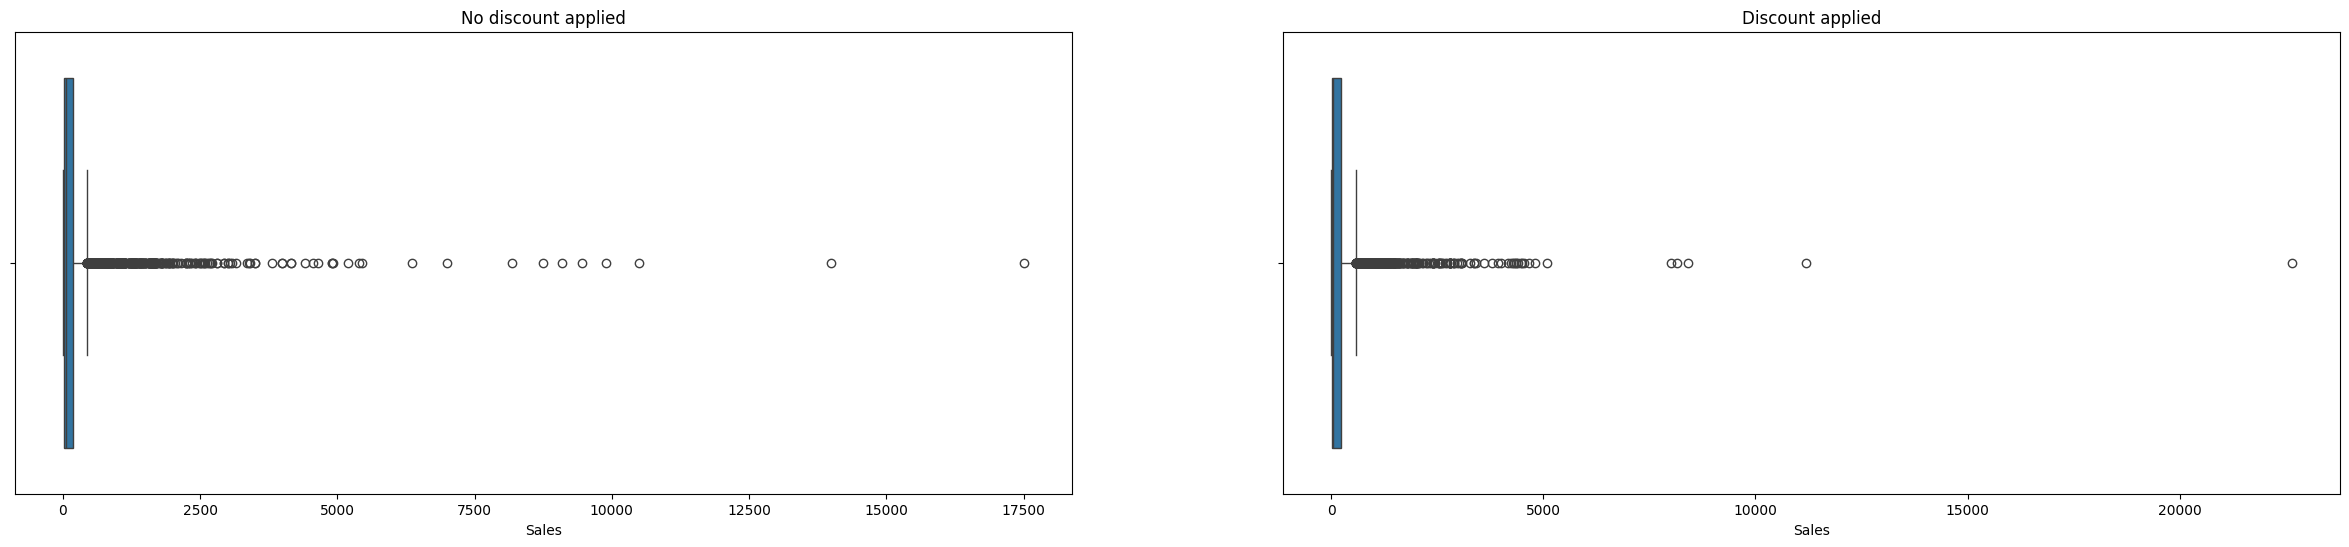

In [252]:
# Check statistics asumption

fig, ax = plt.subplots(1,2, figsize=(30,6))
sns.boxplot(nodiscount_applied, orient='h', ax=ax[0])
sns.boxplot(discount_applied, orient='h', ax=ax[1])
ax[0].set_title('No discount applied')
ax[1].set_title('Discount applied')

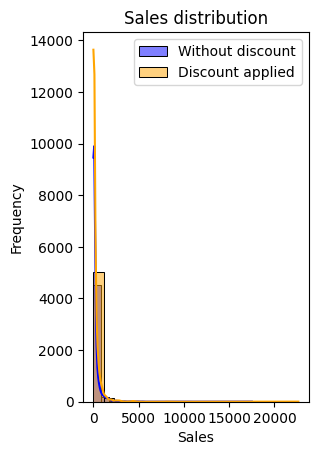

In [253]:
plt.subplot(1, 2, 1)
sns.histplot(nodiscount_applied, bins=20, kde=True, color='blue', label='Without discount')
sns.histplot(discount_applied, bins=20, kde=True, color='orange', label='Discount applied')
plt.title('Sales distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()

From both graph (boxplot & histogram), the data distribution is shown as right skew and have so many outliers. We will try to use another method to check normaliation of the data.

In [254]:
# handling outliers with log transformation

nodiscount_applied = py.log(nodiscount_applied+1)
discount_applied = py.log(discount_applied+1)

In [255]:
from scipy import stats

# handling outliers with log transformation
transform_nodiscount_applied = py.log(nodiscount_applied+1)
transform_discount_applied = py.log(discount_applied+1)

# use saphiro test to check normality of data
shapiro_no_discount = stats.shapiro(transform_nodiscount_applied)
shapiro_with_discount = stats.shapiro(transform_discount_applied)

alpha = 0.05

print("Shapiro-Wilk without discount:", shapiro_no_discount)
print("Shapiro-Wilk discount applied:", shapiro_with_discount)


Shapiro-Wilk without discount: ShapiroResult(statistic=np.float64(0.992701322877705), pvalue=np.float64(5.616062851968872e-15))
Shapiro-Wilk discount applied: ShapiroResult(statistic=np.float64(0.9743328287594487), pvalue=np.float64(1.395175912030712e-29))


The result of shapiro test from both data are:
pvalue without discount = 5.616062851968872e-15 < 0.05
pvalue discount applied = 1.395175912030712e-29 < 0.05

We can inferred that those data isn't distributed normally. And we should consider using another statistic test methode like non parametric statistic

In [256]:
from scipy import stats

# use data before transformed to Mann-Whitney U test
mannwhitney_stat, mannwhitney_p = stats.mannwhitneyu(nodiscount_applied, discount_applied)

print(f"Mann-Whitney U Statistic: {mannwhitney_stat}, P-value: {mannwhitney_p}")

# determince significance level
alpha = 0.05
if mannwhitney_p < alpha:
    print("Reject Ho: There is a significant difference between sales with and without discounts.")
else:
    print("Failed to reject Ho: There is no significant difference.")

Mann-Whitney U Statistic: 12667711.0, P-value: 0.1599276898659544
Failed to reject Ho: There is no significant difference.


From statistical test, the data is shown there is no significant difference between sales transaction using discount or not. Maybe there is another variable that affect sales except discount. 

##### Correlation Between Industry, Segment, Region and Transaction Category
Question: Is there any correlation between Industry and Transaction Category?
* **Ho:** There is no correlation between Industry and Transaction Category.
* **Ha:** There significant correlation between Industry and Transaction Category.

In [257]:
from scipy.stats import chi2_contingency

# defining the table contingency data
chi2_contingency_data = pd.crosstab(df2['Industry'], df2['Transaction Category'])

# chi-square test
stat, p, dof, expected = chi2_contingency(chi2_contingency_data)

# internet p-value
alpha = 0.05
print('p value is ' + str(p))
if p <= alpha:
  print("Reject Ho, there significant correlation between indsutry and transaction category")
else:
  print("Failed to reject Ho, there isn't significant correlation between indsutry and transaction category")



p value is 0.403623258347259
Failed to reject Ho, there isn't significant correlation between indsutry and transaction category


Question: Is there any correlation between Region and Transaction Category?
* **Ho:** There is no correlation between Region and Transaction Category.
* **Ha:** There significant correlation between Region and Transaction Category.

In [258]:

# defining the table contingency data
chi2_contingency_data2 = pd.crosstab(df2['Region'], df2['Transaction Category'])

# chi-square test
stat, p, dof, expected = chi2_contingency(chi2_contingency_data2)

# internet p-value
alpha = 0.05
print('p value is ' + str(p))
if p <= alpha:
  print("Reject Ho, there significant correlation between Region and transaction category")
else:
  print("Failed to reject Ho, there isn't significant correlation between Region and transaction category")

p value is 9.359101185191743e-115
Reject Ho, there significant correlation between Region and transaction category


Question: Is there any correlation between Segment and Transaction Category?
* **Ho:** There is no correlation between Segment and Transaction Category.
* **Ha:** There significant correlation between Segment and Transaction Category.

In [259]:
# defining the table contingency data
chi2_contingency_data3 = pd.crosstab(df2['Segment'], df2['Transaction Category'])

# chi-square test
stat, p, dof, expected = chi2_contingency(chi2_contingency_data3)

# internet p-value
alpha = 0.05

print('p value is ' + str(p))
if p <= alpha:
  print("Reject Ho, there significant correlation between Segmnet and transaction category")
else:
  print("Failed to reject Ho, there isn't significant correlation between Segment and transaction category")

p value is 0.44086454065904945
Failed to reject Ho, there isn't significant correlation between Segment and transaction category


From those statistical tests between `Industry`, `Segment`, and `Region` to `Transaction Categories`, we can conclude:
* The P-values for Industry and Segment >= alpha, so it can be inferred that there isn't any significant correlation between Industry/Segment and Transaction Category.
* On the other hand, p-value Region <= alpha, so we reject Ho and infer a significant correlation between Region and Transaction Category.

##### Analisa statistik produk performance


Question: Is there any difference between profit generated by each prduct?
* Null Hypothesis (Ho): There is no difference in profit generated by each product.
* Alternative Hypothesis (Ha): There is a difference in profit generated by at least one product.

In [260]:
product_performance_data = df2.groupby('Product').agg({
  'Sales' : ['sum', 'mean', 'std'],
  'Profit' : ['sum', 'mean', 'std'],
  'Discount Amount' : ['sum', 'mean', 'std']
}).sort_values(('Sales', 'sum'), ascending=False).round(2)

product_performance_data.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '12px'})

In [261]:
data = df2[['Product','Profit']]

unique_products = data['Product'].unique()
profit_data = []

for product in unique_products:
  profit_data.append(data[data['Product'] == product]['Profit'])

# Perform ANOVA
anova_profit = stats.f_oneway(*profit_data)

# Print the results
print('F-statistic:', anova_profit.statistic)
print('p-value:', anova_profit.pvalue)

alpha = 0.05

if anova_profit.pvalue <= alpha:
  print("Reject(H0): There is a significant difference in profit among products.")
else:
  print("Fail to reject (H0): There is no significant difference in profit among products.")

F-statistic: 69.34456106793705
p-value: 3.3593942593727926e-176
Reject(H0): There is a significant difference in profit among products.


From the statistical test above, we can infered that there any significance correelation between profit generated by each product.

# Conclusion
Based on the analysis that we have done above, we can conclude that:
* Several products have sales rates. It has been affected by other factors such as discount amount. 
* Alchemy becomes the most effective product based on the sales, profit, and discount applied.
* Generally, sales and profit have a positive trend and have consistent growth.
* certain times must be considered when sales and profit growth increase or decrease.
* Customers buying behavior depends on several factors; one is discounts, and the rest are other factors.
* The most potential segment is SMB (Small and Medium Business).
* The top 3 industries are finance, energy, and manufacturing.
* AMEA become the most promising region because it has the most significant order quantity and is the largest SMB segment company. 

# Suggestion

Based on the analysis that we have done above, we can conclude that:
* Focus on products with high-profit margins and low sales volumes. To increase sales, we can offer several promotions or discounts.
* Reduce discounts on low-profit margin products.
* The company must increase sales in certain months when sales and profit increase, generally in Q1 and Q3. 
* Saas can increase the promotional budget or offer discounts on several products.
* Make loyalty programs for several valuable customers, for example, based on total transactions.
* Focus on potential segments based on profit margin, such as SMB.
* Focus on the top 3 valuable industries in each segment.
* Focus on the AMEA region with high sales, profit, and sales quantity. SaaS could consider another region like AMER to increase the diversity of customers (without considering political factors).

In [262]:
# df2.to_excel('Saas_cleaned2.xlsx')